In [102]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

In [103]:
#Speedup reference time.
ref_time=4406

df=pd.read_csv('prof.csv')
df["walltime_s"]=pd.to_timedelta(df['walltime']).astype('timedelta64[s]').astype(int)
df["cputime_s"]=pd.to_timedelta(df['cputime']).astype('timedelta64[s]').astype(int)
df["speedup"]=df.apply(lambda row: ref_time/row["walltime_s"], axis=1)
df["cpuEfficiency"]=df.apply(lambda row: ref_time/(row["walltime_s"]*row["cpus"]),axis=1)
df["maxrssTotal"]=df.apply(lambda row: row["maxrss"]*row["cpus"],axis=1)
df["licenceSeconds"]=df.apply(lambda row: row["lic"]*row["walltime_s"],axis=1)

df_nogpu=df[(df["gpus"]==0)]

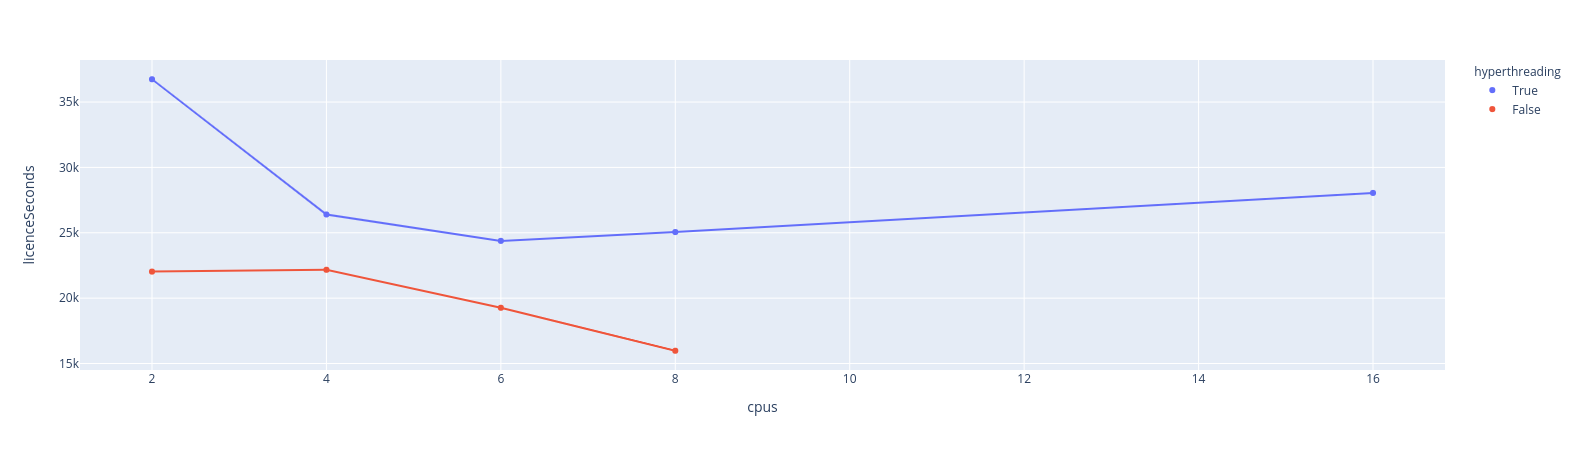

In [106]:
fig = px.scatter(df_nogpu, x="cpus", y="licenceSeconds", color="hyperthreading", trendline="lowess", hover_data={"licenceSeconds":False,"hyperthreading":False,"cpus":False,"walltime":True,"lic":True,"speedup":":.2f","cpuEfficiency":":.0%","maxrss":":.2s%"})
fig.show()

In [19]:
df

,jobid,walltime,cputime,cpus,gpus,hyperthreading,maxrss,lic,walltime_s,cputime_s,speedup,speedupPerTask,maxrssTotal,licenceSeconds
0,19873026,00:29:13,03:52:15,16,0,1,1736648K,16,1753,13935,1.597262,0.099829,1736648K1736648K1736648K1736648K1736648K173664...,28048
1,19889747,00:34:48,03:13:15,8,0,1,1572428K,12,2088,11595,1.340996,0.167625,1572428K1572428K1572428K1572428K1572428K157242...,25056
2,19777633,00:40:38,03:04:48,6,0,1,1552480K,10,2438,11088,1.148482,0.191414,1552480K1552480K1552480K1552480K1552480K1552480K,24380
3,19777634,00:55:00,03:02:31,4,0,1,1509828K,8,3300,10951,0.848485,0.212121,1509828K1509828K1509828K1509828K,26400
4,19777635,01:42:04,03:10:03,2,0,1,1531332K,6,6124,11403,0.457218,0.228609,1531332K1531332K,36744
5,19830317,00:33:17,01:45:39,8,0,0,1521716K,8,1997,6339,1.402103,0.175263,1521716K1521716K1521716K1521716K1521716K152171...,15976
6,19861493,00:45:52,01:56:06,6,0,0,1520148K,7,2752,6966,1.017442,0.169574,1520148K1520148K1520148K1520148K1520148K1520148K,19264
7,19862923,01:01:35,01:53:37,4,0,0,1451756K,6,3695,6817,0.757781,0.189445,1451756K1451756K1451756K1451756K,22170
8,19862924,01:13:26,01:46:53,2,0,0,1442196K,5,4406,6413,0.635497,0.317749,1442196K1442196K,22030
9,19864832,00:44:57,01:53:45,6,1,0,1490256K,8,2697,6825,1.038191,0.173032,1490256K1490256K1490256K1490256K1490256K1490256K,21576
